# Reproduce the Bonzanni 2013 model

>Nicola Bonzanni, Abhishek Garg, K. Anton Feenstra, Judith Schütte, Sarah Kinston, Diego Miranda-Saavedra, Jaap Heringa, Ioannis Xenarios, Berthold Göttgens, Hard-wired heterogeneity in blood stem cells revealed using a dynamic regulatory network model, Bioinformatics, Volume 29, Issue 13, July 2013, Pages i80–i88, https://doi-org.offcampus.lib.washington.edu/10.1093/bioinformatics/btt243

**Goal:**
   
To model the combinatorial interactions of transcription factors with cis-regulatory elements in early blood stem cell development and differentiation.

**Knowledge source:**
  
Literature review

**Representation:**
  
Boolean network
Diagram of the haematopoietic gene regulatory network with logical functions between genes (ellipses) encoded directly by explicit transitions (squares). Activating interactions are shown as blue arrows, repressing interactions in red with ’flat heads’. 

**Tools:**
  
GenYsis, the Boolean modeling toolbox is used to compute attractors of Boolean functions mapped GRN and perform in silico gene perturbation experiments.

**in silico & in vitro validation:**
  
1. Access the expression patterns of the model by comparing it  with two published datasets: a single-cell gene expression profiling study comparing haematopoietic stem with progenitor cells (Ramos et al., 2006) and the haematopoietic fingerprints database, a collection of expression profiling data for HSPCs, as well as nine differentiated lineages (Chambers et al., 2007).
2. Conduct in vitro experiments to validate the inhibition of Fli1 by Gata1.
- The haematopoietic progenitor cell line HPC7 was electroporated with a luciferase reporter construct containing the Fli1 enhancer together with either an empty control plasmid or a Gata1 overexpression construct.


In [ ]:
import numpy as np
import pandas as pd
import biolqm
import ginsim
from rpy2.robjects.packages import importr
from rpy2.robjects import IntVector
from rpy2.robjects.vectors import ListVector
from rpy2 import robjects
from rpy2.robjects import conversion
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
boolnet = importr("BoolNet")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

model_name = "Bonzanni2013"
txt_file = "../../Models/" + model_name + ".txt"
sbml_file = "../../Models/" + model_name + ".sbml"

# Model construction
![Figure 1A](Figure1A.png)  
![Table S2](TableS2.png)  

Based on the network description in Supplementary Table S2, logical functions of the model are summerized into a text file.    
Table S2 only gives the activate/inhibit relationship of pair of genes. According to the author's reply in email, "We picked any given starting condition, and then executed the model, by working through the functions/rules one by one. Until the model stabilizes." That means, the activators are combined using “OR” and inhibitors are combined using “AND”, meaning that any single activator can activate the target; but whenever inhibitors are on, the target gene cannot turn on.
     
Then standardized gene names are then looked up on HGNC and updated.

In [22]:
# Load the network in text file
net = boolnet.loadNetwork(txt_file)

# Export to SBML
boolnet.toSBML(net, sbml_file)
print(boolnet.loadSBML(sbml_file))

Boolean network with 11 genes

Involved genes:
SPI1 GATA1 GATA2 TAL1 ZFPM1 FLI1 ERG CBFA2T3 RUNX1 SMAD6 HHEX

Transition functions:
SPI1 = (FLI1 & !(SPI1 & GATA1))
GATA1 = ((TAL1 & GATA1) & !(SPI1 & GATA1))
GATA2 = ((FLI1 | ERG | (TAL1 & GATA2)) & !(GATA1 & ZFPM1) & !(GATA2 & HHEX))
TAL1 = (FLI1 | ERG | (FLI1 & GATA2) | (TAL1 & GATA1) | (GATA2 & TAL1))
ZFPM1 = (GATA2 & TAL1)
FLI1 = ((FLI1 | GATA2 | ERG | (GATA2 & TAL1)) & !GATA1)
ERG = ((FLI1 | ERG | GATA2 | RUNX1) & !(TAL1 & CBFA2T3))
CBFA2T3 = (TAL1 & GATA2)
RUNX1 = ((SPI1 | RUNX1 | FLI1 | ERG | (GATA2 & TAL1)) & !(RUNX1 & SMAD6))
SMAD6 = (ERG | FLI1 | (TAL1 & GATA2))
HHEX = (FLI1 | ERG | (TAL1 & GATA2))



In [23]:
lqm = biolqm.load(sbml_file)
lrg = biolqm.to_ginsim(lqm)
ginsim.show(lrg)

# Stable states analysis

> In this work, we use the fully asynchronous approach to model the time evolution and compute steady-states of the haematopoietic gene regulatory network (shown in Fig. 1A). The following three assumptions are made in the fully asynchronous modelling approach: (i) at most one gene can change its state (be updated) in a single step. (ii) At least one gene changes its state in a single step unless none of the genes can change their expression levels. (iii) Every gene is equally likely to change its state in a given step. With these constraints, every state can have potentially N successor states, N being the number of genes in the GRN, where each successor state differs from the present state in only one gene expression. The fully asynchronous models have been used often in the literature.

    
Results in the paper:    
   
![Figure 2](Figure2.png)  

### GenYsis
Results using GenYsis/boolSim as in the original paper:  
  
![Results 1](R1.png)  
![Results 2](R2.png)  
(An attractor with more than one state may have more than two columns and node state may contain aspecial value 2, which means that the node can take both values 0 and 1. For each entry with value 2, thecolumn should be duplicated, and the node value replaced by 0 in the first copy, and by 1 in the secondcopy. A column with n entries with value 2 must be expanded to 2n states.)

**Results are the same as the paper, with 3 attractors.**

# Another tool - Boolnet
I run the same analysis using another tool Boolnet, the results are same.

In [135]:
attr = boolnet.getAttractors(net, type="asynchronous")
print(attr)

Attractor 1 is a simple attractor consisting of 1 state(s):

 |--<----------|
 V             |
 00000000000   |
 V             |
 |-->----------|


Genes are encoded in the following order: SPI1 GATA1 GATA2 TAL1 ZFPM1 FLI1 ERG CBFA2T3 RUNX1 SMAD6 HHEX

Attractor 2 is a simple attractor consisting of 1 state(s):

 |--<----------|
 V             |
 01010000000   |
 V             |
 |-->----------|


Genes are encoded in the following order: SPI1 GATA1 GATA2 TAL1 ZFPM1 FLI1 ERG CBFA2T3 RUNX1 SMAD6 HHEX

Attractor 3 is a complex/loose attractor consisting of 32 state(s) and 112 transition(s):

10111111111 => 10111111011
10111111111 => 10111101111
10111111111 => 10011111111
10011111111 => 10011111011
10011111111 => 10011110111
10011111111 => 10011101111
10011111111 => 10010111111
10011111111 => 10111111111
10110111111 => 10110111011
10110111111 => 10110101111
10110111111 => 10111111111
10110111111 => 10010111111
10010111111 => 10010111011
10010111111 => 10010110111
10010111111 => 1001010111

## Export results

In [152]:
# Activate the conversion context to use pandas DataFrame
pandas2ri.activate()

# Access the dataframe stored under the key '1'
attrr = boolnet.plotAttractors(attr)
r_df = attrr.rx2('1')

# Use the local converter context to manage the conversion to a numpy array
with localconverter(robjects.default_converter + pandas2ri.converter):
    np_array = np.array(r_df)

# Extract names from the R dataframe
row_names = list(r_df.rownames)
column_names = list(r_df.colnames)

# Create a pandas DataFrame from the numpy array
df = pd.DataFrame(np_array, index=row_names, columns=column_names)

df_simple = df.T
df_simple.index = df_simple.index.str.replace('Attr', 'S')
df_simple.to_csv('../../SimulationResults/attr_' + model_name + '_simple.csv')
df_simple

,SPI1,GATA1,GATA2,TAL1,ZFPM1,FLI1,ERG,CBFA2T3,RUNX1,SMAD6,HHEX
S1.1,0,0,0,0,0,0,0,0,0,0,0
S2.1,0,1,0,1,0,0,0,0,0,0,0


In [150]:
# Add the complex/loose attractors
attrr_comp = boolnet.plotAttractors(attr,mode = 'graph')
for i in range(attrr.rx2('1').ncol,len(attrr_comp)):
    attr_array = attrr_comp[i][8][2][0]
    if len(attr_array[0]) == len(df):
        # Loop through each binary string in the array
        for idx, binary_str in enumerate(attr_array):
            # Convert each character in the string to an integer and add as a new column
            column_name = f'Attr{i+1}.{idx + 1}'
            df[column_name] = [int(char) for char in binary_str]
    else:
        print("The number of digits in the binary strings does not match the number of DataFrame rows.")

df = df.T
df.index = df.index.str.replace('Attr', 'S')
df.to_csv('../../SimulationResults/attr_' + model_name + '.csv')
df

,SPI1,GATA1,GATA2,TAL1,ZFPM1,FLI1,ERG,CBFA2T3,RUNX1,SMAD6,HHEX
S1.1,0,0,0,0,0,0,0,0,0,0,0
S2.1,0,1,0,1,0,0,0,0,0,0,0
S3.1,1,0,0,1,0,1,0,0,0,1,1
S3.2,1,0,1,1,0,1,0,0,0,1,1
S3.3,1,0,0,1,1,1,0,0,0,1,1
S3.4,1,0,1,1,1,1,0,0,0,1,1
S3.5,1,0,0,1,0,1,1,0,0,1,1
S3.6,1,0,1,1,0,1,1,0,0,1,1
S3.7,1,0,0,1,1,1,1,0,0,1,1
S3.8,1,0,1,1,1,1,1,0,0,1,1


## Clustering

In [138]:
# Define the order of columns as in the paper
column_order = ['ERG', 'CBFA2T3', 'FLI1', 'GATA1', 'GATA2', 'HHEX', 'SPI1', 'RUNX1', 'TAL1', 'SMAD6', 'ZFPM1']
df = df[column_order]
df_added = df.copy()
df_added.loc['Erythroid'] = [1,1,0,1,0,1,0,1,1,0,1] 
df_added.loc['CD8-activated'] = [0,0,1,0,0,0,0,0,0,0,1] 
df_added.loc['CD4-activated'] = [0,0,1,0,0,0,0,1,0,0,1] 
df_added.loc['Monocyte'] = [0,1,1,0,0,1,1,1,0,0,0] 
df_added.loc['B-cell'] = [0,1,1,0,0,1,1,1,0,0,1]
df_added.loc['CD8'] = [0,0,1,0,0,1,1,1,0,0,1]
df_added.loc['CD4'] = [0,0,1,0,0,1,0,1,0,0,1]
df_added.loc['NK'] = [0,1,1,0,0,1,0,1,0,0,1]
df_added.loc['Granulocyte'] = [1,0,1,0,0,1,1,1,1,0,1]
df_added.loc['HSPC'] = [1,1,1,0,1,1,1,1,1,1,1]

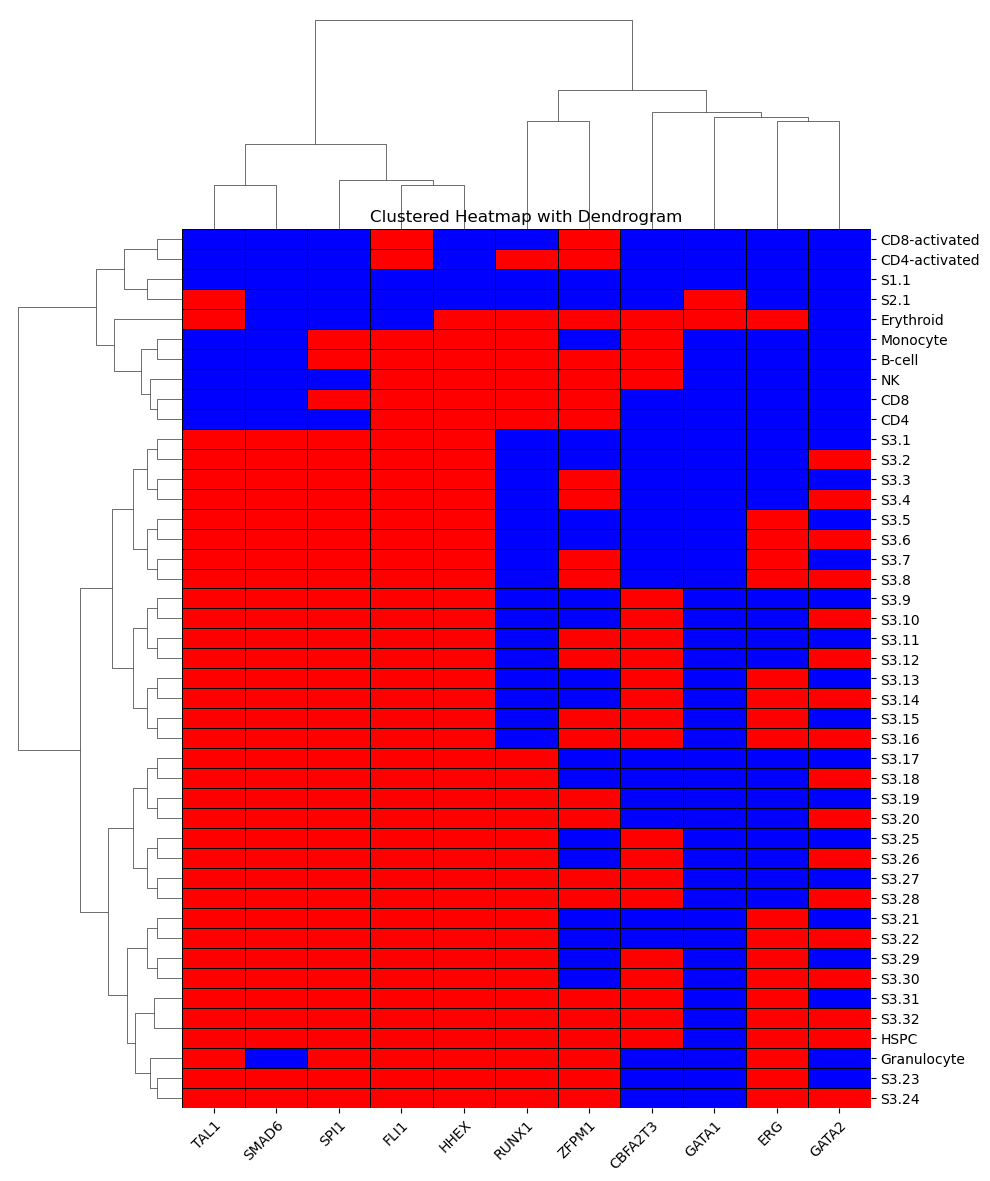

In [153]:
# Define the custom color map
cmap = ListedColormap(['blue', 'red'])

g = sns.clustermap(df_added, method='ward', metric='euclidean', cmap=cmap, linewidths=0.5, linecolor='black', figsize=(10, 12), cbar=False, col_cluster=True)
g.ax_heatmap.set_title('Clustered Heatmap with Dendrogram')
g.ax_heatmap.tick_params(axis='y', labelsize=10)  # Adjust y-tick label size if needed
g.ax_heatmap.tick_params(axis='x', labelsize=10)  # Adjust x-tick label size if needed, rotate if necessary
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Rotate x-tick labels for better readability

# Hide the color bar space if it's not needed
g.cax.set_visible(False)

plt.show()

# Conclusion
**Results from the Bonzanni et al. 2013 are reproducible, though how the rules are combined are not very clear in the paper.**   